QUESTION 1 Part1: (Connie)
Libraries: gmaps, arcGIS, etc

Is there a relationship between overall income vs. the amount of access?

Maps: 1-2. Pick two area codes in San Diego county (92104 and 92113) Mark median income on the Surface area and then plot the restaurants as points ... To "illustrate" the issue 92104, 92113 (income twice as much yet 3 times more GF restaurants)-- from individual zip code files.



In [56]:
%matplotlib inline
#dependencies
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

pd.set_option('display.max_columns', 500)

# File to Load 
mergedData = "Solution/AnalysisData/Final_merged_data.csv"
yelpData = "riley/summarizedYelpData.csv"
incomeData = "riley/incomebyzip.csv"
zipcode1 = "Scott/AnalysisData/YelpDataZip_90028.csv"
zipcode2 = "Scott/AnalysisData/YelpDataZip_90035.csv"

# Read the income and Yelp Data
finalMergedDataDF = pd.read_csv(mergedData)
yelpDataDF = pd.read_csv(yelpData)
incomeDataDF = pd.read_csv(incomeData)
zipcode1DF = pd.read_csv(zipcode1)
zipcode2DF = pd.read_csv(zipcode2)

In [57]:
zipcode2DF.head()

,Unnamed: 0,ID,Name,Zipcode,Latitude,Longitude,Price,Rating,IsGlutenFree
0,0,XrPVlXXa4cHLm7qKWFkfCg,A Food Affair,90035,34.051909,-118.384321,$$,4.5,1
1,1,c5XBNJKu51fAMAXzFkR-mw,Si Laa,90035,34.056198,-118.383578,$$,4.0,1
2,2,vXQJSrp5MyC675Pa0ZCVAg,The Milky Way,90035,34.055122,-118.390195,$$,4.5,1
3,3,UjxOmG74P8YDonujNyxcyg,Fu's Palace,90035,34.054890,-118.382800,$$,3.5,1
4,4,1g0N_c_9zFCdnYDViKnZAA,Trattoria Bella Roma,90035,34.051929,-118.384494,$$,4.5,1


In [58]:
# Scatter plot of one zipcode by lat and long

# filter (locate) dataframes by each city types.
isGlutenFreeYes = zipcode2DF.loc[zipcode2DF['IsGlutenFree'] == 1 , ['Latitude','Longitude', 'IsGlutenFree']]
isGlutenFreeNo = zipcode2DF.loc[zipcode2DF['IsGlutenFree'] == 0, ['Latitude','Longitude', 'IsGlutenFree']]


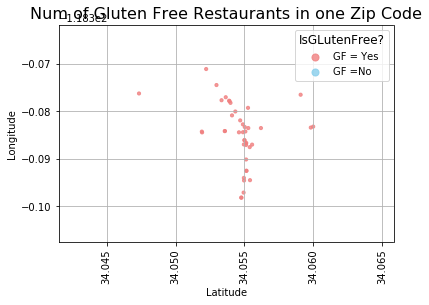

In [59]:
# Build the scatter plots for each city types
# Incorporate the other graph properties
# s is the z axis for getting driver count size(circle sizes
isGlutenFreeYesDF = plt.scatter(isGlutenFreeYes['Latitude'], isGlutenFreeYes['Longitude'], s=isGlutenFreeYes['IsGlutenFree']*10, c='lightcoral', alpha=0.8, edgecolors="lightcoral", label='GF = Yes', linewidth=1)
isGlutenFreeNoDF = plt.scatter(isGlutenFreeNo['Latitude'], isGlutenFreeNo['Longitude'], s=isGlutenFreeNo['IsGlutenFree']*10, c='skyblue', alpha=0.8, edgecolors="skyblue", label='GF =No', linewidth=1)

# isGlutenFreeYesDF.set_facecolor("none")
# isGlutenFreeNoDF.set_facecolor("none")

plt.xticks(rotation='vertical')

# Create a legend
legend = plt.legend(handles=[isGlutenFreeYesDF, isGlutenFreeNoDF],title='IsGLutenFree?',prop={'size':10}, loc="best")
legend.legendHandles[0]._sizes =[50]
legend.legendHandles[1]._sizes =[50]

legend.get_title().set_fontsize('12')

plt.grid(b=True)
plt.title('Num of Gluten Free Restaurants in one Zip Code', loc="center",fontdict={'fontsize':16})
plt.ylabel('Longitude')
plt.xlabel('Latitude')


# Save Figure
save = plt.savefig('Zipcode_90035_Chart.png')

# Show the chart
plt.show()

In [90]:
# bar of glutenfree and non-glutenfree restaurants per zipcode
yelpIncomeMerge = pd.merge(yelpDataDF,incomeDataDF, how ="left", left_on= "Zipcode", right_on ="ZipCode")
# yelpIncomeMerge.count()
yelpIncomeMerge.head(1)

,Unnamed: 0_x,Zipcode,GF_Total,GF_Price_1,GF_Price_2,GF_Price_3,GF_Price_4,GF_Price_0,GF_Rating_10,GF_Rating_15,GF_Rating_20,GF_Rating_25,GF_Rating_30,GF_Rating_35,GF_Rating_40,GF_Rating_45,GF_Rating_50,GF_Price_Mean,GF_Rating_Mean,GF_Price_Std,GF_Rating_Std,ALL_Total,ALL_Price_1,ALL_Price_2,ALL_Price_3,ALL_Price_4,ALL_Price_0,ALL_Rating_10,ALL_Rating_15,ALL_Rating_20,ALL_Rating_25,ALL_Rating_30,ALL_Rating_35,ALL_Rating_40,ALL_Rating_45,ALL_Rating_50,ALL_Price_Mean,ALL_Rating_Mean,ALL_Price_Std,ALL_Rating_Std,Unnamed: 0_y,Population,"Households with household income $200,000 or more",Median family income,Households,Name,zipcode,"Percent of households with income over $200,000",ZipCode
0,0,90006,26,7,15,2,0,0,0,1,1,0,0,6,13,4,1,1.791667,3.826923,0.58823,0.72031,217,98,76,4,0,0,4,7,8,12,20,47,68,34,17,1.47191,3.663594,0.54389,0.890907,29884.0,61230.0,155.0,32273.0,19474.0,ZCTA5 90006,90006.0,0.795933,90006.0


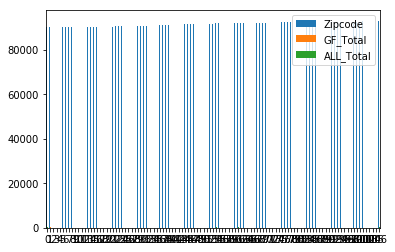

In [111]:
# DATASET 1
allRest_df = yelpIncomeMerge.loc[:,['Zipcode','GF_Total','ALL_Total']]
allRest_df
ax = allRest_df.plot.bar(rot=0)

In [ ]:
maxIncomeGfPercents = maxIncomeGfCounts / maxIncome['Total GF Rest'][14]
gyms = ["Crunch", "Planet Fitness", "NY Sports Club", "Rickie's Gym"]
members = [49, 92, 84, 53]
x_axis = np.arange(0, len(gyms))
tick_locations = []
for x in x_axis:
    tick_locations.append(x)

plt.title("NYC Gym Popularity")
plt.xlabel("Gym Name")
plt.ylabel("Number of Members")

plt.xlim(-0.75, len(gyms)-.25)
plt.ylim(0, max(members) + 5)

plt.bar(x_axis, members, facecolor="red", alpha=0.75, align="center")
plt.xticks(tick_locations, gyms)
plt.show()

## Results
* the graph above is not a good rep since Lat and Log values are so close to each other you cannot see all the restaurants.

In [60]:
finalMergedDataDF.sort_values(by='Median family income', ascending=True)
finalMergedDataDF.head()

,Unnamed: 0,Zip Code,Total GF Rest,Total Number GF $,Total Number GF $$,Total Number GF $$$,Total Number GF $$$$,"Num of Households with income $200,000 or more",Median family income,"Percent of households with income over $200,000"
0,0,90006,26,7,15,2,0,155.0,32273.0,0.795933
1,1,90028,135,37,77,16,1,399.0,45905.0,2.462811
2,2,90032,7,3,4,0,0,268.0,45433.0,1.998658
3,3,90033,7,2,5,0,0,102.0,31595.0,0.774487
4,4,90035,43,5,35,1,0,1922.0,98792.0,14.627093


In [61]:
finalMergedDataDF.dtypes

Unnamed: 0                                           int64
Zip Code                                             int64
Total GF Rest                                        int64
Total Number GF $                                    int64
Total Number GF $$                                   int64
Total Number GF $$$                                  int64
Total Number GF $$$$                                 int64
Num of Households with income $200,000 or more     float64
Median family income                               float64
Percent of households with income over $200,000    float64
dtype: object

In [62]:
# format

# finalMergedDataDF['Median family income'] = finalMergedDataDF['Median family income'].map("${:,.0f}".format)
# finalMergedDataDF['Percent of households with income over $200,000'] = finalMergedDataDF['Percent of households with income over $200,000'].map("{:.2f}%".format)

# Display the data table for preview
finalMergedDataDF.head()

,Unnamed: 0,Zip Code,Total GF Rest,Total Number GF $,Total Number GF $$,Total Number GF $$$,Total Number GF $$$$,"Num of Households with income $200,000 or more",Median family income,"Percent of households with income over $200,000"
0,0,90006,26,7,15,2,0,155.0,32273.0,0.795933
1,1,90028,135,37,77,16,1,399.0,45905.0,2.462811
2,2,90032,7,3,4,0,0,268.0,45433.0,1.998658
3,3,90033,7,2,5,0,0,102.0,31595.0,0.774487
4,4,90035,43,5,35,1,0,1922.0,98792.0,14.627093


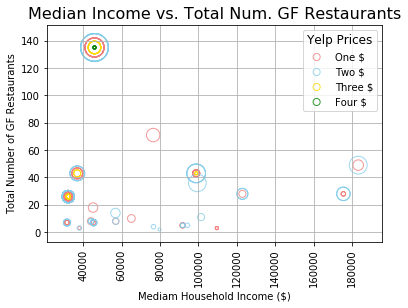

In [63]:
#Figure of GF restaurants and mean income

# Obtain the x and y coordinates for each of the three city types
# for guide on bubble plots
# https://python-graph-gallery.com/272-map-a-color-to-bubble-plot/
# https://pythonspot.com/matplotlib-scatterplot/

# filter (locate) dataframes by each Price types.
dollar1 = finalMergedDataDF.loc[finalMergedDataDF['Total Number GF $'] , ['Median family income','Total GF Rest', 'Total Number GF $']]
dollar2 = finalMergedDataDF.loc[finalMergedDataDF['Total Number GF $$'], ['Median family income','Total GF Rest', 'Total Number GF $$']]
dollar3 = finalMergedDataDF.loc[finalMergedDataDF['Total Number GF $$$'], ['Median family income','Total GF Rest', 'Total Number GF $$$']]
dollar4 = finalMergedDataDF.loc[finalMergedDataDF['Total Number GF $$$$'], ['Median family income','Total GF Rest', 'Total Number GF $$$$']]

# Build the scatter plots for each price types
# Incorporate the other graph properties
# s is the z axis for getting driver count size(circle sizes
dollar1_plot = plt.scatter(dollar1['Median family income'], dollar1['Total GF Rest'], s=dollar1['Total Number GF $']*10, c='lightcoral', alpha=0.8, edgecolors="lightcoral", label='One $', linewidth=1)
dollar2_plot = plt.scatter(dollar2['Median family income'], dollar2['Total GF Rest'], s=dollar2['Total Number GF $$']*10, c='skyblue', alpha=0.8, edgecolors="skyblue", label='Two $', linewidth=1)
dollar3_plot = plt.scatter(dollar3['Median family income'], dollar3['Total GF Rest'], s=dollar3['Total Number GF $$$']*10, c='gold', alpha=0.8, edgecolors="gold", label='Three $', linewidth=1)
dollar4_plot = plt.scatter(dollar4['Median family income'], dollar4['Total GF Rest'], s=dollar4['Total Number GF $$$$']*10, c='green', alpha=0.8, edgecolors="green", label='Four $', linewidth=1)

dollar1_plot.set_facecolor("none")
dollar2_plot.set_facecolor("none")
dollar3_plot.set_facecolor("none")
dollar4_plot.set_facecolor("none")
plt.xticks(rotation='vertical')

# Create a legend
legend = plt.legend(handles=[dollar1_plot, dollar2_plot, dollar3_plot,dollar4_plot],title='Yelp Prices',prop={'size':10}, loc="best")
legend.legendHandles[0]._sizes =[50]
legend.legendHandles[1]._sizes =[50]
legend.legendHandles[2]._sizes =[50]
legend.legendHandles[3]._sizes =[50]
legend.get_title().set_fontsize('12')

plt.grid(b=True)
plt.title('Median Income vs. Total Num. GF Restaurants', loc="center",fontdict={'fontsize':16})
plt.ylabel('Total Number of GF Restaurants')
plt.xlabel('Mediam Household Income ($)')


# Save Figure
save = plt.savefig('MedianIncome_TotalGF.png')

# Show the chart
plt.show()



## Thoughts
* the big dot could be a populous zipcode, which mean it could support more restaurants.
* adjust it with the ratio  (#ofGF/restaurants) as the point value represented.

In [64]:
# Zipcode 90254 with the highest median family income

maxIncome = finalMergedDataDF.loc[finalMergedDataDF['Zip Code'] == 90254]
maxIncome

,Unnamed: 0,Zip Code,Total GF Rest,Total Number GF $,Total Number GF $$,Total Number GF $$$,Total Number GF $$$$,"Num of Households with income $200,000 or more",Median family income,"Percent of households with income over $200,000"
14,14,90254,49,11,32,4,0,2591.0,183097.0,28.17223


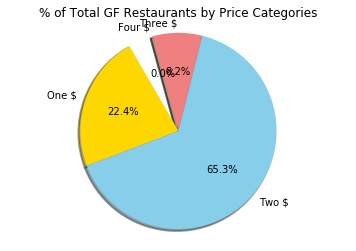

In [65]:
maxIncomeGfCounts = [maxIncome['Total Number GF $'][14], maxIncome['Total Number GF $$'][14], maxIncome['Total Number GF $$$'][14],maxIncome['Total Number GF $$$$'][14]]
maxIncomeGfPercents = maxIncomeGfCounts / maxIncome['Total GF Rest'][14]


prices = ['One $','Two $','Three $', 'Four $']

# Build Pie Chart
plt.title("% of Total GF Restaurants by Price Categories")
plt.pie(maxIncomeGfPercents, explode=(0,0,0,0), labels=prices, colors=["gold", "skyblue", "lightcoral", "green"],
        autopct="%1.1f%%", shadow=True, startangle=120,
       wedgeprops={'linewidth':2})
plt.axis("equal")
plt.savefig('Highest Income Zipcode Pie Chart.png')
plt.show()

In [66]:
# Zipcode 92401 with lowest median family income
minIncome = finalMergedDataDF.loc[finalMergedDataDF['Zip Code'] == 92401]
minIncome 

,Unnamed: 0,Zip Code,Total GF Rest,Total Number GF $,Total Number GF $$,Total Number GF $$$,Total Number GF $$$$,"Num of Households with income $200,000 or more",Median family income,"Percent of households with income over $200,000"
92,92,92401,1,0,1,0,0,0.0,16469.0,0.0


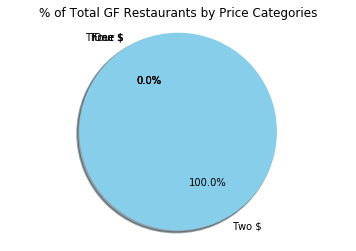

In [67]:
minIncomeGfCounts = [minIncome['Total Number GF $'][92], minIncome['Total Number GF $$'][92], minIncome['Total Number GF $$$'][92], minIncome['Total Number GF $$$$'][92]]
minIncomeGfPercents = minIncomeGfCounts / minIncome['Total GF Rest'][92]


prices = ['One $','Two $','Three $', 'Four $']

# Build Pie Chart
plt.title("% of Total GF Restaurants by Price Categories")
plt.pie(minIncomeGfPercents, explode=(0,0,0,0), labels=prices, colors=["gold", "skyblue", "lightcoral","green"],
        autopct="%1.1f%%", shadow=True, startangle=120,
       wedgeprops={'linewidth':2})
plt.axis("equal")
plt.savefig('Lowest Income Zipcode Pie Chart.png')
plt.show()

In [68]:
# Zipcode 90028 with highest total GF Restaurant count
maxGF = finalMergedDataDF.loc[finalMergedDataDF['Zip Code'] == 90028]
maxGF 

,Unnamed: 0,Zip Code,Total GF Rest,Total Number GF $,Total Number GF $$,Total Number GF $$$,Total Number GF $$$$,"Num of Households with income $200,000 or more",Median family income,"Percent of households with income over $200,000"
1,1,90028,135,37,77,16,1,399.0,45905.0,2.462811


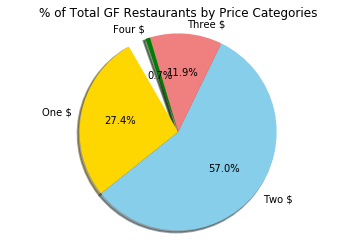

In [69]:
gfCounts = [maxGF['Total Number GF $'][1], maxGF['Total Number GF $$'][1], maxGF['Total Number GF $$$'][1], maxGF['Total Number GF $$$$'][1]]
gfPercents = gfCounts / maxGF['Total GF Rest'][1]


prices = ['One $','Two $','Three $', 'Four $']

# Build Pie Chart
plt.title("% of Total GF Restaurants by Price Categories")
plt.pie(gfPercents, explode=(0,0,0,0), labels=prices, colors=["gold", "skyblue", "lightcoral",'green'],
        autopct="%1.1f%%", shadow=True, startangle=120,
       wedgeprops={'linewidth':2})
plt.axis("equal")
plt.savefig('MAx GF Count Pie Chart.png')
plt.show()